In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.metrics import silhouette_score


In [90]:
# !pip install geopandas

In [91]:
df = pd.read_csv('chipotle_stores.csv')

In [92]:
df.head()

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220


In [93]:
df.shape

(2629, 5)

In [94]:
states = gpd.read_file('us-states.json')
type(states)

geopandas.geodataframe.GeoDataFrame

In [95]:
states.head()

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


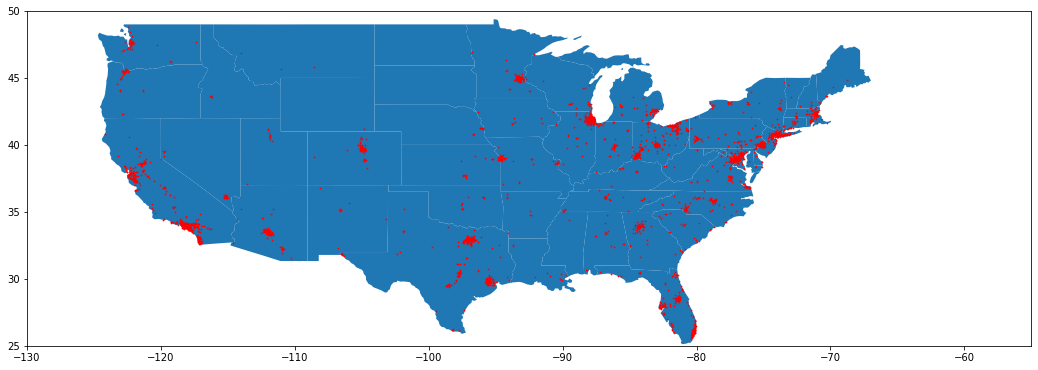

'\nCreate the repository\nInstall geopandas\nPlot the US map\nVisualize your data on this map\nPlot a dendrogram of your data to help you decide the appropriate clustering resolution\nCompare and analyze different clustering methods using intrinsic analysis to decide on a chosen method.\nChoose a centroid/address to live\nPublish your results to a GitHub page with an explanation of your method.\n'

In [96]:
# plt.subplots(figsize=(18,10))
states.plot(figsize=(18,10))
plt.scatter(df["longitude"], df["latitude"],s=0.5, color="r")
plt.xlim([-130,-55])
plt.ylim([25,50])
plt.show()

"""
Create the repository
Install geopandas
Plot the US map
Visualize your data on this map
Plot a dendrogram of your data to help you decide the appropriate clustering resolution
Compare and analyze different clustering methods using intrinsic analysis to decide on a chosen method.
Choose a centroid/address to live
Publish your results to a GitHub page with an explanation of your method.
"""

# conda install -c conda-forge descartes


In [97]:
df.columns


Index(['state', 'location', 'address', 'latitude', 'longitude'], dtype='object')

In [98]:
states.columns

Index(['id', 'name', 'geometry'], dtype='object')

In [99]:
df

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
5,Alabama,Hoover,"1759 Montgomery Hwy Hoover, AL 35244 US",33.378958,-86.803802
6,Alabama,Huntsville,"5900 University Dr NW Ste D2 Huntsville, AL 35...",34.742319,-86.665720
7,Alabama,Mobile,"3871 Airport Blvd Mobile, AL 36608 US",30.675338,-88.143754
8,Alabama,Mobile,"7765 Airport Blvd D100 Mobile, AL 36608 US",30.682731,-88.224998
9,Alabama,Montgomery,"2560 Berryhill Rd Ste C Montgomery, AL 36117 US",32.359177,-86.162253


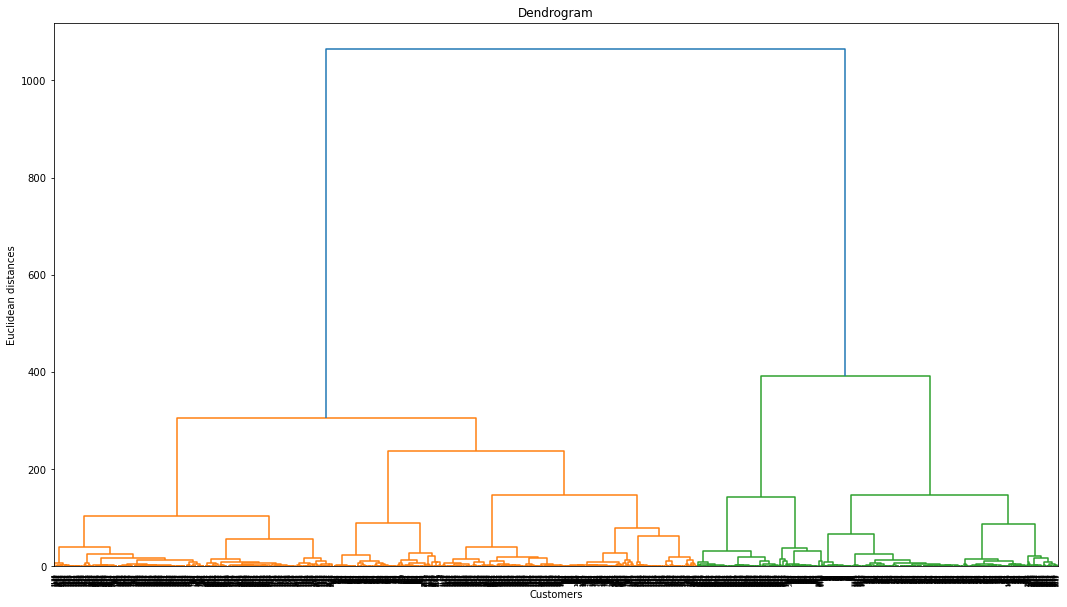

In [100]:
import scipy.cluster.hierarchy as sch
X = df.loc[:,['longitude','latitude']]
plt.figure(figsize=(18,10))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [101]:
#state with high density
df['state'].value_counts()
#let's fix the threshold at 70 by state

California        421
Texas             226
Ohio              193
Florida           177
New York          160
Illinois          144
Virginia          107
Pennsylvania       96
Maryland           94
Arizona            85
Colorado           79
Minnesota          71
New Jersey         69
North Carolina     65
Massachusetts      62
Georgia            61
Washington         43
Indiana            40
Michigan           39
Missouri           39
Oregon             32
Kansas             30
Nevada             29
Tennessee          26
Connecticut        24
Washington DC      21
Kentucky           21
South Carolina     21
Wisconsin          20
Alabama            15
Oklahoma           12
Utah               11
Iowa               10
Louisiana          10
Nebraska           10
New Mexico          9
Delaware            9
Rhode Island        9
New Hampshire       8
West Virginia       6
Arkansas            6
Maine               5
Idaho               4
Montana             3
Vermont             2
North Dako

In [102]:
#location with the highest density (above 10 locations)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_location = df['location'].value_counts().nlargest(40)
df_location

New York         52
Chicago          36
Houston          31
Columbus         22
Washington DC    21
Los Angeles      20
Las Vegas        19
Phoenix          19
Dallas           19
Cincinnati       17
Brooklyn         16
Austin           16
Orlando          16
Denver           15
Atlanta          15
San Diego        15
San Jose         14
San Antonio      13
Charlotte        13
Aurora           13
Philadelphia     13
Kansas City      13
Baltimore        12
Sacramento       12
Springfield      12
Pittsburgh       11
Columbia         10
Jacksonville     10
Tampa            10
Portland         10
Scottsdale       10
Miami            10
San Francisco     9
Richmond          9
Tucson            9
Fort Worth        9
Indianapolis      9
Minneapolis       9
Glendale          8
Lakewood          8
Name: location, dtype: int64

In [103]:
# list of locations with more than 10 chepotles
locations = df['location'].value_counts().index.tolist()[:32]
locations

['New York',
 'Chicago',
 'Houston',
 'Columbus',
 'Washington DC',
 'Los Angeles',
 'Las Vegas',
 'Phoenix',
 'Dallas',
 'Cincinnati',
 'Brooklyn',
 'Austin',
 'Orlando',
 'Denver',
 'Atlanta',
 'San Diego',
 'San Jose',
 'San Antonio',
 'Charlotte',
 'Aurora',
 'Philadelphia',
 'Kansas City',
 'Baltimore',
 'Sacramento',
 'Springfield',
 'Pittsburgh',
 'Columbia',
 'Jacksonville',
 'Tampa',
 'Portland',
 'Scottsdale',
 'Miami']

In [104]:
# dataframe with highest density
df_best_location = df.loc[df['location'].isin(locations)]
df_best_location.head(10)

,state,location,address,latitude,longitude
49,Arizona,Phoenix,"100 E Camelback Rd 200 Phoenix, AZ 85012 US",33.509660,-112.071679
50,Arizona,Phoenix,"11 W Washington St Suite 140 Phoenix, AZ 85003 US",33.448061,-112.074456
51,Arizona,Phoenix,"1515 N 7th Ave Ste 120 Phoenix, AZ 85007 US",33.465598,-112.082381
52,Arizona,Phoenix,"1660 E Camelback Rd Ste 185 Phoenix, AZ 85016 US",33.510375,-112.046220
53,Arizona,Phoenix,"16635 N Tatum Blvd Ste 100 Phoenix, AZ 85032 US",33.638185,-111.977387
54,Arizona,Phoenix,"1818 W Bethany Home Rd Phoenix, AZ 85015 US",33.524380,-112.098686
55,Arizona,Phoenix,"21001 N Tatum Blvd Phoenix, AZ 85050 US",33.674753,-111.975275
56,Arizona,Phoenix,"2415 E Baseline Rd Ste 111 Phoenix, AZ 85042 US",33.377257,-112.029873
57,Arizona,Phoenix,"2450 W Bell Rd Ste 5 Phoenix, AZ 85023 US",33.640373,-112.112279
58,Arizona,Phoenix,"2470 W Happy Valley Rd Ste 1181 Phoenix, AZ 85...",33.714657,-112.112572


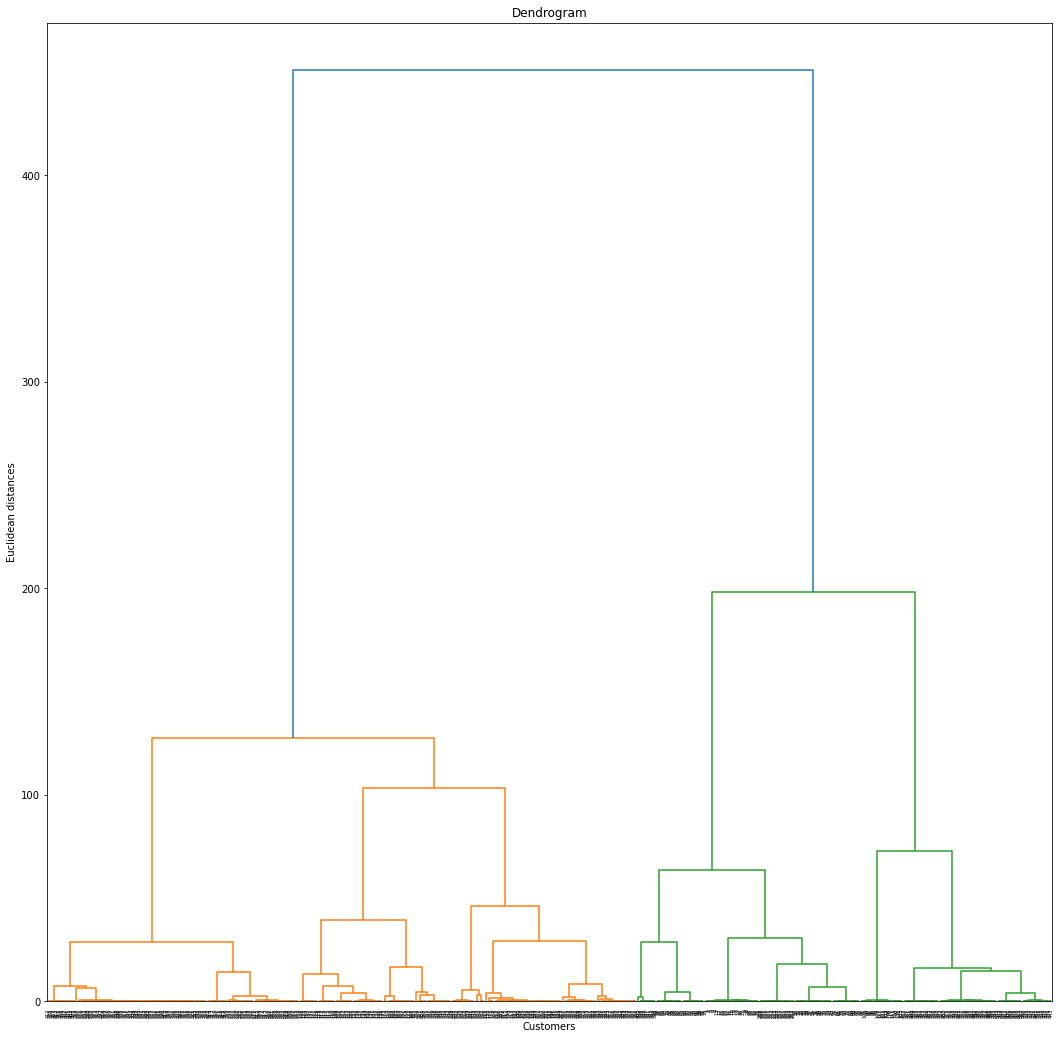

In [105]:
import scipy.cluster.hierarchy as sch
X = df_best_location.loc[:,['longitude','latitude']]
plt.figure(figsize=(18,18))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Using KMeans

In [162]:
#clustering using all the data
from sklearn.cluster import KMeans
# all the data 
y = df[['longitude','latitude']]
# fit a kmeans object to the dataset
km = KMeans(n_clusters=24, init='k-means++')
kmeans = km.fit(y)
# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
y_clust = y.join(cluster_labels.to_frame())

y_clust.head(10)

,longitude,latitude,cluster
0,-85.487328,32.606813,14
1,-86.802756,33.509721,14
2,-86.647437,33.595581,14
3,-86.698279,33.422582,14
4,-86.841220,34.154134,14
5,-86.803802,33.378958,14
6,-86.665720,34.742319,14
7,-88.143754,30.675338,22
8,-88.224998,30.682731,22
9,-86.162253,32.359177,14


In [163]:
# #set cluster as index
# y_clust.set_index('cluster').sort_index()  ?????

In [134]:
cluster_centers 

array([[ -88.18255967,   41.69140037],
       [-115.03324929,   36.06639951],
       [ -74.27219454,   40.75226538],
       [ -96.90085357,   33.03722318],
       [ -82.42667036,   30.59887527],
       [-121.68092101,   37.88152046],
       [ -80.81967277,   41.2491054 ],
       [-105.04530226,   39.64634512],
       [ -93.37352833,   44.87668047],
       [-117.97067755,   33.89600122],
       [ -76.97812174,   38.84467438],
       [-122.32331428,   46.34125905],
       [ -85.60049177,   33.99773883],
       [ -84.21261263,   39.56260321],
       [ -94.93795393,   38.73614116],
       [ -81.87898934,   28.28139383],
       [-105.05868857,   33.36420883],
       [-111.88437399,   33.31917758],
       [ -80.42651427,   26.24309957],
       [ -79.91197141,   35.291369  ],
       [ -96.43252964,   29.82431582],
       [-112.79926856,   42.3569709 ],
       [ -83.73810153,   42.3365901 ],
       [ -71.50591636,   42.40810932]])

In [135]:
 #cluster_labels  # has been add as the cluster column

In [168]:
y_clust.head(16)

,longitude,latitude,cluster
0,-85.487328,32.606813,14
1,-86.802756,33.509721,14
2,-86.647437,33.595581,14
3,-86.698279,33.422582,14
4,-86.841220,34.154134,14
5,-86.803802,33.378958,14
6,-86.665720,34.742319,14
7,-88.143754,30.675338,22
8,-88.224998,30.682731,22
9,-86.162253,32.359177,14


In [169]:
metric_1 = np.array([y_clust[y_clust['cluster']==12][['longitude','latitude']]])
metric_1

array([[[-112.27319357,   33.46437706],
        [-112.5583039 ,   33.4383084 ],
        [-111.71123533,   32.87913006],
        [-111.9660838 ,   33.7991455 ],
        [-111.8572606 ,   33.26392224],
        [-111.89998219,   33.30528109],
        [-111.96882762,   33.31742039],
        [-111.661643  ,   35.18986   ],
        [-111.79089592,   33.32988022],
        [-111.80763961,   33.3779242 ],
        [-111.7427414 ,   33.3081148 ],
        [-111.7889158 ,   33.281812  ],
        [-112.2034538 ,   33.6659131 ],
        [-112.1856023 ,   33.5523649 ],
        [-112.18452255,   33.61131276],
        [-112.22530474,   33.64207418],
        [-112.26195147,   33.53508568],
        [-112.35866283,   33.46380663],
        [-110.9799733 ,   31.909951  ],
        [-112.1689994 ,   33.37927   ],
        [-111.091652  ,   32.35488472],
        [-112.0428503 ,   33.0735015 ],
        [-111.80335687,   33.45106526],
        [-111.85682719,   33.38960599],
        [-111.6839359 ,   33.3898773 ],


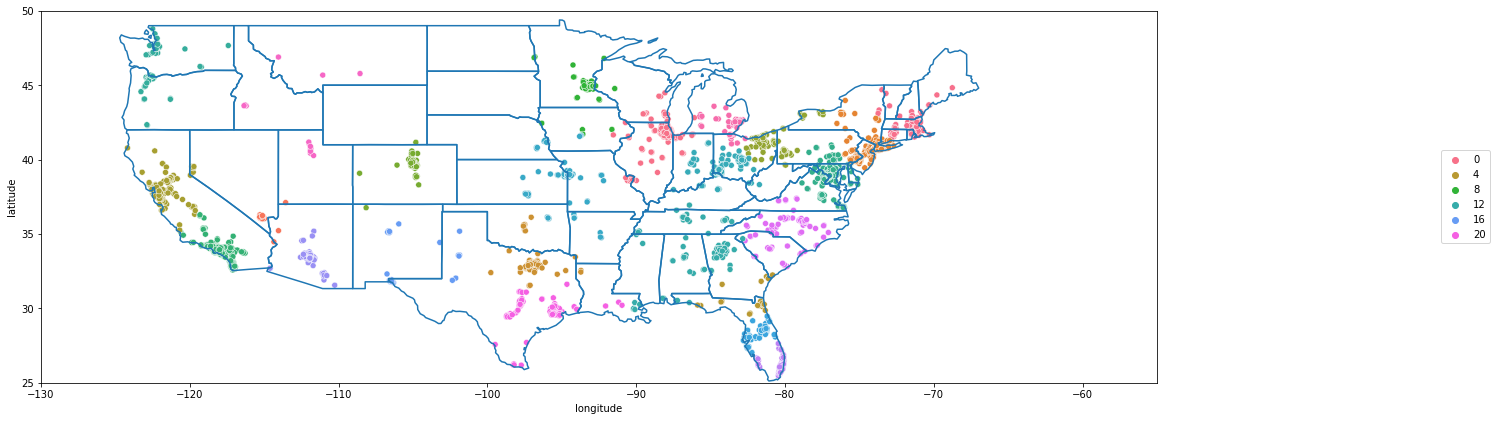

In [137]:
states.boundary.plot(figsize=(20,20))
g = sns.scatterplot(x='longitude', y='latitude', data=y_clust, hue='cluster', palette='husl')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.xlim([-130,-55])
plt.ylim([25,50])
plt.show()

#sns.lmplot(x='longitude', y='latitude', height=5, data=y,fit_reg=False, hue='cluster')

In [138]:
# select the one with the minimum distance to the 

In [139]:
# z = df.loc[df['location'] == 'New York']
# z[['longitude','latitude']].head(10)

In [199]:

def distance_to_other_locations(y):   #using Eucledian distance 

    '''
    Given a Point, the function sums up the total distance from the Point to the cluster centers, without taking into account the other clusters 

    '''
    # if not pokemon.loc[pokemon.isin(['weight_zscore', 'height_zscore', 'cluster'])].all():
    #      return
    metric = np.array([y['longitude'], y['latitude']])
    cluster_number = round(y['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index != cluster_number :
            continue
        center = cluster_centers[cluster_index]         #longitude and latitude of the centroide in the cluster
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all chipoltles
y_distance = y_clust.apply(distance_to_other_locations, axis=1)
y_distance = y_distance.rename('distance')

# join to other metrics
y_processed = y_clust.join(y_distance.to_frame())      #.join(y['name'].to_frame())

# pick most dissimilar chipotle per cluster
choosen_point_kmean = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    y_cluster = y_processed[y_processed['cluster'] == cluster_index]
    choosen_point_kmean = choosen_point_kmean.append(y_cluster[y_cluster['distance']==y_cluster['distance'].min()])


In [ ]:

# def distance_to_other_locations(y):   #using Eucledian distance 
    
#         for i in range(len(cluster_centers)):
#             metric = np.array([y_clust[y_clust['cluster']==i][['longitude','latitude']]])
#             distance = 0
#             for j in range (len(metric)): 
#                 metric_1 = np.delete(metric, j, axis=0)    #excluding the selected chepotle
#                 metric_2 = metric[j]
#                 distance += np.sqrt(sum(np.square(metric_1 - metric_2)))

#             return distance  

In [159]:
choosen_point_kmean.head(5)

,longitude,latitude,cluster,distance
981,-88.205119,41.711823,0,0.030431
1463,-115.043449,36.063149,1,0.010705
1564,-74.248149,40.805237,2,0.058174
2216,-96.913723,33.020376,3,0.021200
704,-81.829889,30.196356,4,0.719840


In [142]:
# point with 
choosen_point_kmean.loc[choosen_point['dissimilarity'] == choosen_point['dissimilarity'].min()]

,longitude,latitude,cluster,dissimilarity
2583,-76.980441,38.846545,10,0.002979


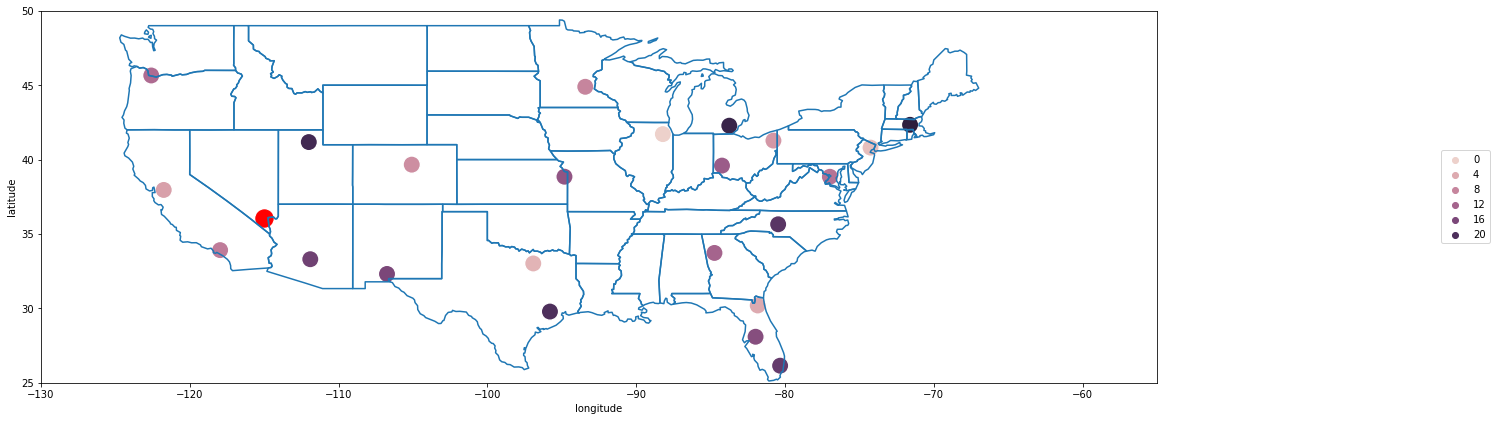

In [197]:
# def AddPoint(plot, x, y, color):
#     plot.scatter(x, y, c=color)
#     plot.clf()
#     plot.show()

states.boundary.plot(figsize=(20,20))
g = sns.scatterplot(x='longitude', y='latitude', data=choosen_point_kmean, hue='cluster', s=300)
plt.scatter(-115.043449, 36.063149, c='red', s= 300)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.xlim([-130,-55])
plt.ylim([25,50])
plt.show()


In [157]:
predict = kmeans.fit_predict(y)
predict

array([3, 3, 3, ..., 0, 0, 8], dtype=int32)

In [154]:
# score the prediction of the clustering
km_silhouette_score = silhouette_score(y_clust, predict)
km_silhouette_score

0.7136159138531772

## Using DBscan

In [156]:
y_scan = df[['latitude', 'longitude']]
y_scan.head()

,latitude,longitude
0,32.606813,-85.487328
1,33.509721,-86.802756
2,33.595581,-86.647437
3,33.422582,-86.698279
4,34.154134,-86.841220


In [ ]:
from sklearn.cluster import DBSCAN

# fit a DBSCAN to the dataset
dbscan = DBSCAN(eps=0.6, min_samples=2).fit(df_coord)

# add cluster index to dataframe
cluster_labels = pd.Series(dbscan.labels_, name='cluster')
dbscan_df = df_coord.join(cluster_labels.to_frame())